# Script Contents

#### .01 Import Libraries & Latest Data
#### .02 Add Price Categories to Latest Data
#### .03 Perfomr a Cluster Analysis on Latest Data

## .01 Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [9]:
# define path
path = r"C:\Users\jacks\Portuguese Real Estate Analysis"

In [11]:
# Importing data
df = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'port_cleaned_regions.xlsx'))

## .02 Add Price Categories to Dataset

In [13]:
# Create categories for the price variable
df.loc[df['Price'] < 85000, 'Price category'] = 'Low price'
df.loc[(df['Price'] >= 85000) & (df['Price'] < 396000), 'Price category'] = 'Middle price'
df.loc[df['Price'] >= 396000, 'Price category'] = 'High price'

In [15]:
df.head()

,Unnamed: 0,Price,District,City,Town,Type,EnergyCertificate,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms,Price category
0,0,250000,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,1,True,1992,114,2,1,0,114,2,Middle price
1,1,9500,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,0,False,1990,27,3,2,0,27,1,Low price
2,2,580000,Faro,Vila do Bispo,Budens,Apartment,D,1,True,2003,84,2,1,0,84,2,High price
3,3,350000,Faro,Portimão,Portimão,Apartment,C,0,False,1985,68,2,1,0,68,1,Middle price
4,4,175000,Faro,Faro,Faro (Sé e São Pedro),House,NC,0,False,1950,78,4,2,0,78,2,Middle price


In [17]:
# Export cleaned data
df.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'port_cleaned_cat.xlsx'))

In [29]:
# Dropping non-numeric columns
df_num = df.drop(['Unnamed: 0','District','City','Town','Type','EnergyCertificate','HasParking', 'Price category'], axis=1)

In [31]:
df_num.head()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,250000,1,1992,114,2,1,0,114,2
1,9500,0,1990,27,3,2,0,27,1
2,580000,1,2003,84,2,1,0,84,2
3,350000,0,1985,68,2,1,0,68,1
4,175000,0,1950,78,4,2,0,78,2


## .03 Cluster Analysis on Cleaned Data

In [36]:
# Importing a method for standardizing the data
from sklearn.preprocessing import StandardScaler

In [38]:
# Define standard scaler 
scaler = StandardScaler() 

In [40]:
# Transform data 
df_num = scaler.fit_transform(df_num)

In [42]:
# Convert to a DataFrame
df_num = pd.DataFrame(df_num)

In [44]:
df_num.head()

,0,1,2,3,4,5,6,7,8
0,-0.178866,0.438011,0.234880,-0.008390,-0.396618,-0.653054,-0.317292,-0.064535,0.265763
1,-0.551538,-0.675664,0.146655,-0.008408,0.055519,0.062311,-0.317292,-0.068156,-0.323579
2,0.332492,0.438011,0.720115,-0.008396,-0.396618,-0.653054,-0.317292,-0.065783,0.265763
3,-0.023909,-0.675664,-0.073906,-0.008400,-0.396618,-0.653054,-0.317292,-0.066449,-0.323579
4,-0.295084,-0.675664,-1.617836,-0.008397,0.507657,0.062311,-0.317292,-0.066033,0.265763


In [50]:
# Dropping non-numeric columns again from original df to get column names for df_num
df_int = df.drop(['Unnamed: 0','District','City','Town','Type','EnergyCertificate','HasParking', 'Price category'], axis=1)

In [52]:
# Assign column names from df_int to df_num
df_num.columns = df_int.columns

In [54]:
df_num.head()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,-0.178866,0.438011,0.234880,-0.008390,-0.396618,-0.653054,-0.317292,-0.064535,0.265763
1,-0.551538,-0.675664,0.146655,-0.008408,0.055519,0.062311,-0.317292,-0.068156,-0.323579
2,0.332492,0.438011,0.720115,-0.008396,-0.396618,-0.653054,-0.317292,-0.065783,0.265763
3,-0.023909,-0.675664,-0.073906,-0.008400,-0.396618,-0.653054,-0.317292,-0.066449,-0.323579
4,-0.295084,-0.675664,-1.617836,-0.008397,0.507657,0.062311,-0.317292,-0.066033,0.265763


In [56]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)
# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [58]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

score

[-895212.0000000016,
 -727225.5525537038,
 -635021.6942300163,
 -609994.6301643122,
 -523774.9184732599,
 -457957.699341423,
 -417429.5789722628,
 -422777.3965934468,
 -358385.3068862738]

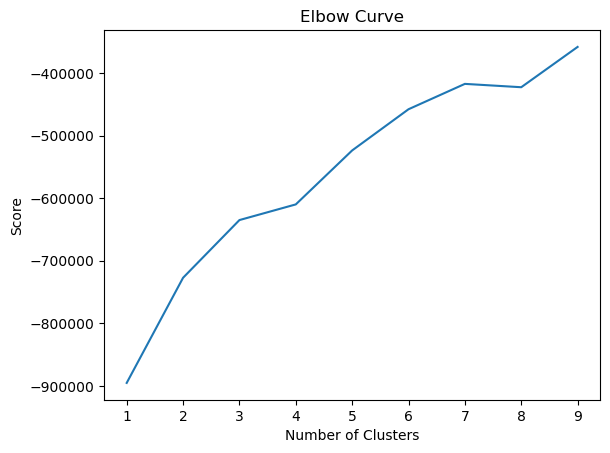

In [60]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is no exact elbow in the chart but the chart does appear to flatten some at 3 clusters then again at 5 clusters. 

#### Based on the elbow chart, I will use 3 clusters in the k-means algorithm. Although the elbow does not completely flatten at 3 clusters, there isn't flattening again until 5 clusters and 5 or more clusters is too many for each cluster to have an effective size in the k-means algorithm. 

In [64]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [66]:
# Fit the k-means object to the data.
kmeans.fit(df_num)

KMeans(n_clusters=3)

In [70]:
df_num.head()

,Price,Parking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms,clusters
0,-0.178866,0.438011,0.234880,-0.008390,-0.396618,-0.653054,-0.317292,-0.064535,0.265763,1
1,-0.551538,-0.675664,0.146655,-0.008408,0.055519,0.062311,-0.317292,-0.068156,-0.323579,0
2,0.332492,0.438011,0.720115,-0.008396,-0.396618,-0.653054,-0.317292,-0.065783,0.265763,1
3,-0.023909,-0.675664,-0.073906,-0.008400,-0.396618,-0.653054,-0.317292,-0.066449,-0.323579,0
4,-0.295084,-0.675664,-1.617836,-0.008397,0.507657,0.062311,-0.317292,-0.066033,0.265763,0


In [72]:
df_num['clusters'].value_counts()

clusters
0    57729
1    34368
2     7371
Name: count, dtype: int64

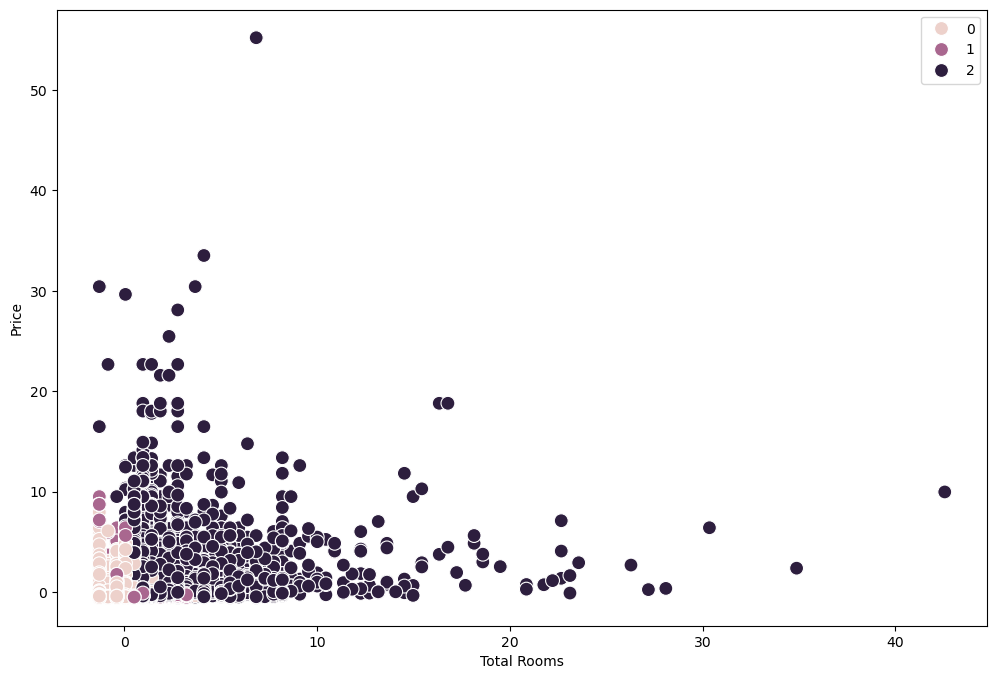

In [74]:
# Plot the clusters for the "Price" and "Total Rooms" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['TotalRooms'], y=df_num['Price'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Total Rooms') 
plt.ylabel('Price') 
plt.show()

In [76]:
# Export df with cluster column data
df_num.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'port_clusters.xlsx'))